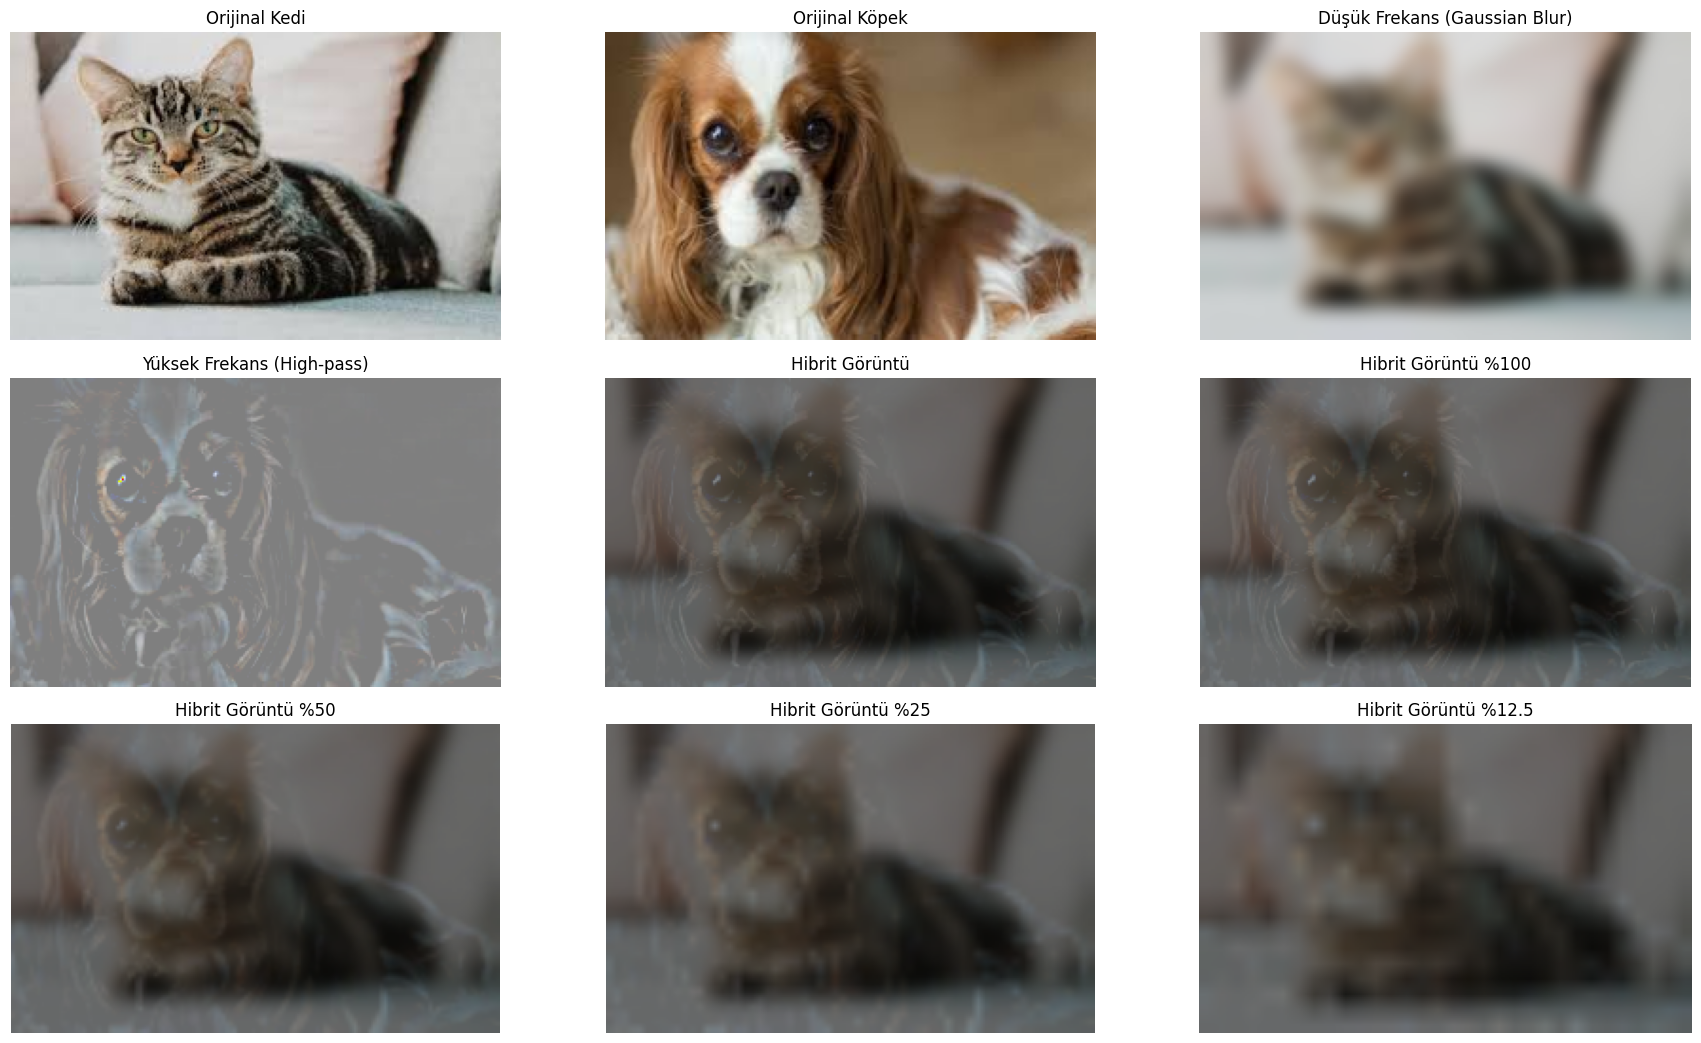

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def load_and_prepare_images(path1, path2):
    img1 = cv2.imread(path1)
    img2 = cv2.imread(path2)

    if img1 is None or img2 is None:
        raise ValueError("❌ Görseller yüklenemedi. Dosya yollarını kontrol et!")

    h, w = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    new_h = min(h, h2)
    new_w = min(w, w2)

    img1_resized = cv2.resize(img1, (new_w, new_h))
    img2_resized = cv2.resize(img2, (new_w, new_h))

    # BGR to RGB
    img1_rgb = cv2.cvtColor(img1_resized, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2RGB)

    return img1_rgb, img2_rgb


def generate_hybrid_image(img1, img2, ksize=21, sigma=5):
    low_frequencies = cv2.GaussianBlur(img1, (ksize, ksize), sigma)
    blurred_img2 = cv2.GaussianBlur(img2, (ksize, ksize), sigma)
    high_frequencies = cv2.subtract(img2, blurred_img2)
    hybrid_img = cv2.addWeighted(low_frequencies, 0.5, high_frequencies, 0.5, 0)
    return low_frequencies, high_frequencies, hybrid_img


def build_scaled_versions(image, scales):
    versions = []
    target_height = image.shape[0]
    for s in scales:
        img = cv2.resize(image, (0, 0), fx=s, fy=s)
        if img.shape[0] != target_height:
            ratio = target_height / img.shape[0]
            img = cv2.resize(img, (int(img.shape[1] * ratio), target_height))
        versions.append(img)
    return versions


def plot_results(original1, original2, low_pass, high_pass, hybrid_image, hybrid_versions, scale_labels):
    plt.figure(figsize=(18, 14))

    # İlk 5 temel görüntü
    plt.subplot(4, 3, 1)
    plt.imshow(original1)
    plt.title("Orijinal Kedi")
    plt.axis('off')

    plt.subplot(4, 3, 2)
    plt.imshow(original2)
    plt.title("Orijinal Köpek")
    plt.axis('off')

    plt.subplot(4, 3, 3)
    plt.imshow(low_pass)
    plt.title("Düşük Frekans (Gaussian Blur)")
    plt.axis('off')

    plt.subplot(4, 3, 4)
    plt.imshow(high_pass + 127)  # Ortalamaya sabitle
    plt.title("Yüksek Frekans (High-pass)")
    plt.axis('off')

    plt.subplot(4, 3, 5)
    plt.imshow(hybrid_image)
    plt.title("Hibrit Görüntü")
    plt.axis('off')

    # Ölçekli hibrit görüntüler
    for i, (img, label) in enumerate(zip(hybrid_versions, scale_labels)):
        plt.subplot(4, 3, 6 + i)
        plt.imshow(img)
        plt.title(f"Hibrit Görüntü {label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


# 🔽 Yolları buraya yaz (Google Colab'e yüklediğin dosya adları!)
path_cat = '/content/image1.jpg'  # kedi
path_dog = '/content/image2.jpg'  # köpek

# ✨ Adım adım işlemler
cat_img, dog_img = load_and_prepare_images(path_cat, path_dog)
low_freq, high_freq, hybrid = generate_hybrid_image(cat_img, dog_img)
scales = [1.0, 0.5, 0.25, 0.125]
scale_labels = ['%100', '%50', '%25', '%12.5']
hybrid_versions = build_scaled_versions(hybrid, scales)

# 🎨 Grafiklerle tüm çıktıları göster
plot_results(cat_img, dog_img, low_freq, high_freq, hybrid, hybrid_versions, scale_labels)
